rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15         int64
kid16_17         int64
creditcd         int64
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object
            rev_Mean       mou_Mean    totmrc_Mean        da_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       58.719985     513.559937      46.179136       0.888828   
std        46.208972     524.229868      23.581283       2.173729   
min        -6.167500       0.000000     -26.915000       0.000000   
25%        33.311875     151.500000      30.000000       0.000000   
50%        48.377500     357.500000      44.990000       0.247500   
75%        70.630000     701.250000      59.990000       0.888828   
max      3843.262500   12206.750000     409.990000     159.390000   

         ovrmou_Mean    ovrrev_Mean    vceovr_Mean    datovr_Mean  \
count  100000.000000  100000.

[8 rows x 100 columns]
             rev_Mean  mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
rev_Mean     1.000000  0.706029     0.602148  0.403806     0.772117   
mou_Mean     0.706029  1.000000     0.575567  0.394583     0.575611   
totmrc_Mean  0.602148  0.575567     1.000000  0.306966     0.200732   
da_Mean      0.403806  0.394583     0.306966  1.000000     0.304596   
ovrmou_Mean  0.772117  0.575611     0.200732  0.304596     1.000000   
...               ...       ...          ...       ...          ...   
kid11_15    -0.031579 -0.041025    -0.039307 -0.022057    -0.019526   
kid16_17    -0.024173 -0.011050    -0.030636 -0.024773    -0.012576   
creditcd    -0.075563 -0.121184    -0.083557 -0.040018    -0.045441   
eqpdays     -0.211453 -0.312126    -0.245804 -0.119349    -0.126732   
Customer_ID  0.009710  0.097047     0.060695  0.000396     0.010059   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
rev_Mean        0.776647     0.772159     0.152

C:\Users\s114sing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Prediction Score
0.5836
Confusion Matrix for Logistic Regression
[[6132 3889]
 [4439 5540]]


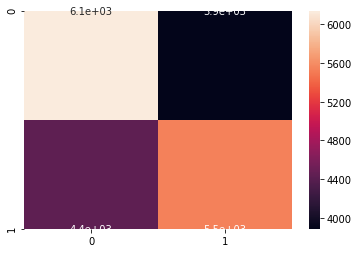

C:\Users\s114sing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Decision Tree Classifier Prediction Score
0.5532
Confusion Matrix for Decision Tree
[[5545 4476]
 [4460 5519]]


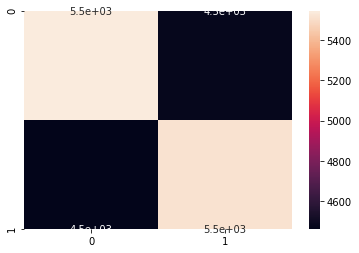

Attributes affecting the Customer to Port Out from Existing Service Provider
Random Forest Classifier Prediction Score
0.60505
Confusion Matrix for Random Forrest
[[5481 4540]
 [3359 6620]]


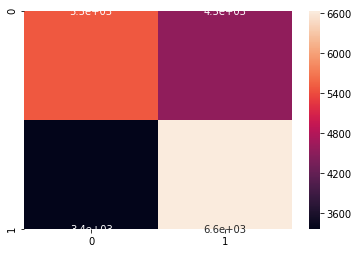

Attributes affecting the Customer to Port Out from Existing Service Provider


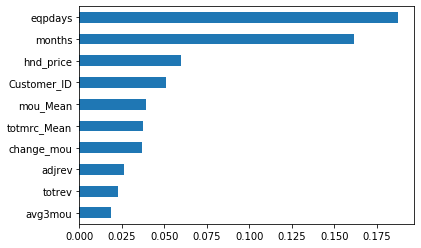

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots
from sklearn import metrics
# Using Keras for deep learning with TensorFlow as backend 
from keras.models import Sequential, Input  
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from hyperas.distributions import choice, uniform #hyperas for tunning Deep learning
import os

dict = {}
# This path should be user specific based upon file locaiton where Input data is located
os.chdir('C:\\Users\\s114sing\\OneDrive - Nokia\\Training Material\\Hackathon\\telecom-customer')
data = pd.read_csv('Telecom_Manipulated_Data.csv')
print(data.dtypes)
print(data.describe(include = [np.number]))
col = list (data.describe(include = [np.number]))
print (col)
print(data)
print(data.describe())
print(data.corr())
y = data['churn'].values
X = data.drop(columns= ['churn'])
#cor_data = data[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean','asl_flag','hnd_price','eqpdays']].to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(cor_data, y, test_size=0.2, random_state=42)

#================================================================================================================
# [Running logistic regression model]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print("Logistic Regression Prediction Score")
LogisticReg = metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))
dict['Logistic Regression']= LogisticReg
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
#Printing the Weightage of Column for Prediction. User can uncomment below two lines of Code for getting the Result
#print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))
#print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))
#
#Code for Splitting into four Quadrants
#0-0 True Positive - Actual and Predicted values are Correct
#0-1 False Negative - Actual Values are Correct and Predicted values are wrong
#1-0 False Positive - Actual Values are Wrong and Predicted values are correct 
#1-1 True Negative - Actual Values and Predictive values are Incorrect
print ("Confusion Matrix for Logistic Regression")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction_test)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
#If user wanted to print the Classification Report, Uncomment the below 2 lines of Code and Execute it
#from sklearn.metrics import classification_report
#print(classification_report(y_test,prediction_test))
#===================================================================================================================
# [Running Decision Tree Model]
# Splitting the data set into training and testing datasets
# We use the module model_selection
# Within this module, we use the method called test train split
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,test_size=0.2, random_state = 42)
#Building Decision Tree Model 
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth = 6, random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
# Finding the predicted probabilities
clf.predict_proba(X_test)
# Computing ROC AUC Score from  the actual labels and the predicted probabilities from the decision tree model
metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
# Performing grid search cross validation for fine tuning 
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state=42)
mod = ms.GridSearchCV(clf, param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)
#Printing the Best Estimator
mod.best_estimator_
#Printing the Best Score
mod.best_score_
#Training
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print("Decision Tree Classifier Prediction Score")
DecisionTree = metrics.accuracy_score(y_test, prediction_test)
print(metrics.accuracy_score(y_test, prediction_test))
dict['Decision Tree'] = DecisionTree
#
#Code for Splitting into four Quadrants
#0-0 True Positive - Actual and Predicted values are Correct
#0-1 False Negative - Actual Values are Correct and Predicted values are wrong
#1-0 False Positive - Actual Values are Wrong and Predicted values are correct 
#1-1 True Negative - Actual Values and Predictive values are Incorrect
print ("Confusion Matrix for Decision Tree")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction_test)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
#If user wanted to print the Classification Report, Uncomment the below 2 lines of Code and Execute it
#from sklearn.metrics import classification_report
#print(classification_report(y_test,prediction_test))
#
# This code is meant for printing the Attributes as Decision Tree with highest weightage / Prediction descending from Top to Bottom
#Code for Printing the Decision Tree
#import pydotplus
# This path should be user specific based upon the file
#os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
# Use the trained model which is stored in the object clf to create a representation feature_names is the column names in my predictor matrix 
# The classes are the two classes of the target variable 
#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["0","1"], filled=True, rounded= True, special_characters=True, proportion= True)
# Create a graph representation from dot_data
#graph = pydotplus.graph_from_dot_data(dot_data)
# Use the image module to visualize the tree that was just built. 
#from IPython.display import Image
# Printing the Decision Tree
print ("Attributes affecting the Customer to Port Out from Existing Service Provider")
#Image(graph.create_png())
#===================================================================================================================
# [Running Random Forest Model]
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =10, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
# Make predictions for Random Forrest Algorithm
prediction_test = model_rf.predict(X_test)
print("Random Forest Classifier Prediction Score")
RandomForest = metrics.accuracy_score(y_test, prediction_test)
print(metrics.accuracy_score(y_test, prediction_test))
dict['Random Forest'] = RandomForest
#
#Code for Splitting into four Quadrants
#0-0 True Positive - Actual and Predicted values are Correct
#0-1 False Negative - Actual Values are Correct and Predicted values are wrong
#1-0 False Positive - Actual Values are Wrong and Predicted values are correct 
#1-1 True Negative - Actual Values and Predictive values are Incorrect
print ("Confusion Matrix for Random Forrest")
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction_test)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()
#If user wanted to print the Classification Report, Uncomment the below 2 lines of Code and Execute it
#from sklearn.metrics import classification_report
#print(classification_report(y_test,prediction_test))
# This code is meant for printing the Attributes with highest weightage / Prediction
print ("Attributes affecting the Customer to Port Out from Existing Service Provider")
importances = model_rf.feature_importances_
weights = pd.Series(importances,index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
#===================================================================================================================

#print('All Alogorithm with there score ',dict)
#max_algo = max(dict, key = dict.get)
#print('The Algorithm with Highest predection value is ',max_algo)

In [15]:
#Deep Learning Algorithm
#Checking correlation percentage  with output variable

cor = data.corr()
cor_target = abs(cor["churn"]) # reutrns attributes cor

#Selecting highly correlated features with prediction output & droping non corelated data
relevant_features = cor_target[cor_target>0.05]
relevant_features_length = len(relevant_features)
print(relevant_features)
print(relevant_features_length)

mou_Mean         0.056925
totmrc_Mean      0.068434
comp_vce_Mean    0.051574
mou_cvce_Mean    0.052042
complete_Mean    0.051740
churn            1.000000
asl_flag         0.069473
hnd_price        0.102748
eqpdays          0.112286
Name: churn, dtype: float64
9


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________
None


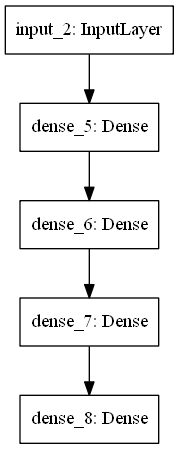

In [35]:
#Selecting high co-related attributes with 'churn'
cor_data = data[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean','asl_flag','hnd_price','eqpdays']].to_numpy()

#Create Train and Test datset 
Y = data['churn'].values #churn values to be predicted  
X = cor_data # dataset with higest co-related attributes
#X = data.drop(columns= ['churn'])
#X = X.drop(columns= ['Customer_ID'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
np.shape(X_train)

# Using Keras funcitonal API with 3 hidden layer
visible = Input(shape=(8,))
hidden1 = Dense(15, activation='relu')(visible) #hidden layer with 15 neurons with activation function as 'relu'
hidden2 = Dense(15, activation='relu')(hidden1)#hidden layer with 15 neurons with activation function as 'relu'
hidden3 = Dense(10, activation='relu')(hidden2)#hidden layer with 15 neurons with activation function as 'relu'
output = Dense(1, activation='sigmoid')(hidden3)#output layer with 1 neuron with activiation function as 'sigmoid'
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [36]:
#defining optimizer , loss & metrics
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          epochs=1000,batch_size=1000)

Epoch 1/1000
80000/80000 [==============================] - ETA: 2:41 - loss: 6.1560 - accuracy: 0.46 - ETA: 25s - loss: 4.0095 - accuracy: 0.4780 - ETA: 13s - loss: 3.0731 - accuracy: 0.475 - ETA: 9s - loss: 2.6253 - accuracy: 0.474 - ETA: 5s - loss: 2.1402 - accuracy: 0.47 - ETA: 4s - loss: 1.8482 - accuracy: 0.48 - ETA: 2s - loss: 1.6632 - accuracy: 0.48 - ETA: 2s - loss: 1.5452 - accuracy: 0.48 - ETA: 1s - loss: 1.4653 - accuracy: 0.48 - ETA: 1s - loss: 1.3990 - accuracy: 0.48 - ETA: 0s - loss: 1.3232 - accuracy: 0.48 - ETA: 0s - loss: 1.2693 - accuracy: 0.48 - ETA: 0s - loss: 1.2169 - accuracy: 0.48 - ETA: 0s - loss: 1.1731 - accuracy: 0.49 - 3s 35us/step - loss: 1.1672 - accuracy: 0.4911
Epoch 2/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.7291 - accuracy: 0.50 - ETA: 1s - loss: 0.7189 - accuracy: 0.51 - ETA: 1s - loss: 0.7173 - accuracy: 0.52 - ETA: 2s - loss: 0.7168 - accuracy: 0.52 - ETA: 1s - loss: 0.7166 - accuracy: 0.52 - ETA: 1s - loss: 0.7174 - ac

80000/80000 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.54 - ETA: 0s - loss: 0.6859 - accuracy: 0.55 - ETA: 0s - loss: 0.6858 - accuracy: 0.54 - ETA: 0s - loss: 0.6845 - accuracy: 0.55 - ETA: 0s - loss: 0.6844 - accuracy: 0.55 - ETA: 0s - loss: 0.6846 - accuracy: 0.55 - ETA: 0s - loss: 0.6844 - accuracy: 0.55 - ETA: 0s - loss: 0.6852 - accuracy: 0.55 - 0s 6us/step - loss: 0.6847 - accuracy: 0.5541
Epoch 17/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.55 - ETA: 2s - loss: 0.6861 - accuracy: 0.55 - ETA: 0s - loss: 0.6839 - accuracy: 0.55 - ETA: 0s - loss: 0.6841 - accuracy: 0.55 - ETA: 0s - loss: 0.6838 - accuracy: 0.55 - ETA: 0s - loss: 0.6841 - accuracy: 0.55 - ETA: 0s - loss: 0.6842 - accuracy: 0.55 - ETA: 0s - loss: 0.6841 - accuracy: 0.55 - ETA: 0s - loss: 0.6842 - accuracy: 0.55 - 1s 6us/step - loss: 0.6843 - accuracy: 0.5556
Epoch 18/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6791 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.59 - ETA: 0s - loss: 0.6800 - accuracy: 0.56 - ETA: 0s - loss: 0.6812 - accuracy: 0.55 - ETA: 0s - loss: 0.6813 - accuracy: 0.55 - ETA: 0s - loss: 0.6815 - accuracy: 0.55 - ETA: 0s - loss: 0.6806 - accuracy: 0.55 - ETA: 0s - loss: 0.6810 - accuracy: 0.55 - ETA: 0s - loss: 0.6810 - accuracy: 0.55 - ETA: 0s - loss: 0.6812 - accuracy: 0.55 - 0s 6us/step - loss: 0.6810 - accuracy: 0.5579
Epoch 34/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6795 - accuracy: 0.55 - ETA: 0s - loss: 0.6824 - accuracy: 0.55 - ETA: 0s - loss: 0.6810 - accuracy: 0.55 - ETA: 0s - loss: 0.6812 - accuracy: 0.55 - ETA: 0s - loss: 0.6806 - accuracy: 0.56 - ETA: 0s - loss: 0.6802 - accuracy: 0.56 - ETA: 0s - loss: 0.6805 - accuracy: 0.55 - ETA: 0s - loss: 0.6807 - accuracy: 0.55 - ETA: 0s - loss: 0.6808 - accuracy: 0.55 - 0s 6us/step - loss: 0.6808 - accuracy: 0.5581
Epoch 35/1000
80000/80000 [=================

80000/80000 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.54 - ETA: 0s - loss: 0.6788 - accuracy: 0.56 - ETA: 0s - loss: 0.6794 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6803 - accuracy: 0.56 - ETA: 1s - loss: 0.6803 - accuracy: 0.56 - ETA: 1s - loss: 0.6805 - accuracy: 0.56 - ETA: 1s - loss: 0.6806 - accuracy: 0.56 - ETA: 1s - loss: 0.6809 - accuracy: 0.56 - ETA: 1s - loss: 0.6805 - accuracy: 0.56 - ETA: 1s - loss: 0.6804 - accuracy: 0.56 - ETA: 1s - loss: 0.6802 - accuracy: 0.56 - ETA: 2s - loss: 0.6800 - accuracy: 0.56 - ETA: 2s - loss: 0.6799 - accuracy: 0.56 - ETA: 2s - loss: 0.6802 - accuracy: 0.56 - ETA: 2s - loss: 0.6800 - accuracy: 0.56 - ETA: 2s - loss: 0.6800 - accuracy: 0.56 - ETA: 2s - loss: 0.6798 - accuracy: 0.56 - ETA: 2s - loss: 0.6798 - accuracy: 0.56 - ETA: 2s - loss: 0.6799 - accuracy: 0.56 - ETA: 2s - loss: 0.6798 - accuracy: 0.56 - ETA: 2s - loss: 0.6800 - accu

80000/80000 [==============================] - ETA: 1s - loss: 0.6846 - accuracy: 0.54 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6787 - accuracy: 0.56 - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - 0s 6us/step - loss: 0.6789 - accuracy: 0.5669
Epoch 59/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6687 - accuracy: 0.58 - ETA: 0s - loss: 0.6806 - accuracy: 0.56 - ETA: 0s - loss: 0.6801 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6793 - accuracy: 0.56 - ETA: 0s - loss: 0.6793 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - 0s 6us/step - loss: 0.6789 - accuracy: 0.5676
Epoch 60/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6791 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6740 - accuracy: 0.56 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6787 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.57 - ETA: 0s - loss: 0.6779 - accuracy: 0.57 - 0s 5us/step - loss: 0.6783 - accuracy: 0.5700
Epoch 76/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.57 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - 0s 5us/step - loss: 0.6781 - accuracy: 0.5698
Epoch 77/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6691 - accuracy: 0.58 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - 

80000/80000 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.57 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - 0s 5us/step - loss: 0.6776 - accuracy: 0.5707
Epoch 94/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6825 - accuracy: 0.55 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6787 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - 0s 5us/step - loss: 0.6777 - accuracy: 0.5707
Epoch 95/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6778 - accuracy: 0.58 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - 

Epoch 110/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6816 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - 1s 7us/step - loss: 0.6773 - accuracy: 0.5720
Epoch 111/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6804 - accuracy: 0.55 - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - 0s 6us/step - loss: 0.6772 - acc

80000/80000 [==============================] - ETA: 0s - loss: 0.6694 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - 0s 5us/step - loss: 0.6771 - accuracy: 0.5711
Epoch 129/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - 0s 5us/step - loss: 0.6768 - accuracy: 0.5719
Epoch 130/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 

80000/80000 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - 0s 5us/step - loss: 0.6766 - accuracy: 0.5731
Epoch 148/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6732 - accuracy: 0.58 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - 0s 5us/step - loss: 0.6767 - accuracy: 0.5722
Epoch 149/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6774 

80000/80000 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.58 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - 0s 6us/step - loss: 0.6764 - accuracy: 0.5726
Epoch 165/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6785 - accuracy: 0.56 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - 0s 5us/step - loss: 0.6765 - accuracy: 0.5720
Epoch 166/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6765 

80000/80000 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - 0s 5us/step - loss: 0.6762 - accuracy: 0.5727
Epoch 183/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.54 - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - 0s 6us/step - loss: 0.6762 - accuracy: 0.5728
Epoch 184/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6799 

80000/80000 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - 0s 6us/step - loss: 0.6758 - accuracy: 0.5737
Epoch 199/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6698 - accuracy: 0.59 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - 1s 7us/step - loss: 0.6762 - accuracy: 0.5727
Epoch 200/1000
80000/80000 [===============

80000/80000 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - 0s 6us/step - loss: 0.6757 - accuracy: 0.5741
Epoch 212/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.56 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - 0s 6us/step - loss: 0.6758 - accuracy: 0.5736
Epoch 213/1000
80000/80000 [===============

80000/80000 [==============================] - ETA: 0s - loss: 0.6695 - accuracy: 0.58 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - 0s 6us/step - loss: 0.6759 - accuracy: 0.5725
Epoch 225/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6798 - accuracy: 0.55 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - 0s 5us/step - loss: 0.6759 - accuracy: 0.5734
Epoch 226/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6652 

80000/80000 [==============================] - ETA: 1s - loss: 0.6655 - accuracy: 0.59 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 1s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6744 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accu

80000/80000 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.58 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.58 - ETA: 2s - loss: 0.6734 - accuracy: 0.58 - ETA: 2s - loss: 0.6738 - accuracy: 0.58 - ETA: 2s - loss: 0.6739 - accuracy: 0.58 - ETA: 2s - loss: 0.6742 - accuracy: 0.57 - ETA: 2s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6748 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - 1s 14us/step - loss: 0.6757 - accuracy: 0.5740
Epoch 248/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.55 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6801 - accuracy: 0.56 - ETA: 0s - loss: 0.6798 - accuracy: 0.56 - ETA: 1s - loss: 0.6795 - accuracy: 0.56 - ETA: 1s - loss: 0.6799 - accuracy: 0.56 - ETA: 2s - loss: 0.6792 - accuracy: 0.56 - ETA: 1s - loss: 0.6777 - accuracy: 0.56 - ETA: 1s - loss: 0.6776 - accuracy: 0.56 - ETA: 1s - loss: 0.6778 - accuracy: 0.56 - ETA: 1s - loss: 0.6775 - accuracy: 0.56 - ETA: 1s - loss: 0.6770 - accuracy: 0.56 - ETA: 1s - loss: 0.6767 - accuracy: 0.56 - ETA: 0s - loss: 0.6768 - accuracy: 0.56 - ETA: 1s - loss: 0.6768 - accuracy: 0.56 - ETA: 1s - loss: 0.6769 - accuracy: 0.56 - ETA: 1s - loss: 0.6767 - accuracy: 0.56 - ETA: 1s - loss: 0.6766 - accuracy: 0.57 - ETA: 1s - loss: 0.6766 - accuracy: 0.56 - ETA: 1s - loss: 0.6766 - accuracy: 0.56 - ETA: 1s - loss: 0.6766 - accuracy: 0.57 - ETA: 1s - loss: 0.6764 - accuracy: 0.57 - ETA: 1s - loss: 0.6764 - accuracy: 0.57 - ETA: 2s - loss: 0.6762 - accu

Epoch 270/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6707 - accuracy: 0.56 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - 0s 6us/step - loss: 0.6755 - accuracy: 0.5731
Epoch 271/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.60 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - 0s 6us/step - loss: 0.6755 - accuracy: 0.5738
Epoch 272/1000
80000/80000 [

80000/80000 [==============================] - ETA: 1s - loss: 0.6706 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.58 - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 1s 8us/step - loss: 0.6751 - accuracy: 0.5750
Epoch 285/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6703 - accuracy: 0.59 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6780 - accuracy: 0.55 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 0s 5us/step - loss: 0.6751 - accuracy: 0.5745
Epoch 301/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6812 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 0s 5us/step - loss: 0.6750 - accuracy: 0.5747
Epoch 302/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 

80000/80000 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.58 - ETA: 0s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - 0s 5us/step - loss: 0.6751 - accuracy: 0.5749
Epoch 319/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - 1s 7us/step - loss: 0.6748 - accuracy: 0.5755
Epoch 320/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6798 

80000/80000 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.55 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 0s 5us/step - loss: 0.6745 - accuracy: 0.5753
Epoch 337/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6726 - accuracy: 0.56 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - 0s 5us/step - loss: 0.6746 - accuracy: 0.5749
Epoch 338/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6812 - accuracy: 0.55 - ETA: 0s - loss: 0.6761 

80000/80000 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.54 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 1s 6us/step - loss: 0.6745 - accuracy: 0.5748
Epoch 355/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6616 - accuracy: 0.61 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6744 - accuracy: 0.5750
E

Epoch 371/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6780 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 0s 6us/step - loss: 0.6741 - accuracy: 0.5759
Epoch 372/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6551 - accuracy: 0.60 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6742 - accuracy: 0.5759
Epoch 373/1000
80000/80000 [

Epoch 388/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 0s 5us/step - loss: 0.6740 - accuracy: 0.5755
Epoch 389/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.56 - ETA: 0s - loss: 0.6733 - accuracy: 0.56 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6738 - accuracy: 0.5757
Epoch 390/1000
80000/80000 [==============================] - ETA: 1s 

80000/80000 [==============================] - ETA: 1s - loss: 0.6859 - accuracy: 0.58 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 0s 6us/step - loss: 0.6737 - accuracy: 0.5763
Epoch 407/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6760 - accuracy: 0.58 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6740 - accuracy: 0.5761
Epoch 408/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6705 

80000/80000 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.59 - ETA: 0s - loss: 0.6724 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 0s 6us/step - loss: 0.6741 - accuracy: 0.5761
Epoch 425/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6695 - accuracy: 0.58 - ETA: 0s - loss: 0.6702 - accuracy: 0.58 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - 0s 5us/step - loss: 0.6739 - accuracy: 0.5757
Epoch 426/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6768 

80000/80000 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.58 - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 0s 5us/step - loss: 0.6739 - accuracy: 0.5766
Epoch 443/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.58 - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - 0s 5us/step - loss: 0.6737 - accuracy: 0.5765
Epoch 444/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6836 - accuracy: 0.55 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 

80000/80000 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.60 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - 0s 5us/step - loss: 0.6737 - accuracy: 0.5757
Epoch 460/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6663 - accuracy: 0.58 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 0s 6us/step - loss: 0.6738 - accuracy: 0.5760
Epoch 461/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6757 

80000/80000 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 0s 5us/step - loss: 0.6738 - accuracy: 0.5766
Epoch 478/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.60 - ETA: 0s - loss: 0.6708 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 0s 5us/step - loss: 0.6734 - accuracy: 0.5770
Epoch 479/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.56 - ETA: 0s - loss: 0.6744 

80000/80000 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.55 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 0s 5us/step - loss: 0.6736 - accuracy: 0.5764
Epoch 495/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 0s 5us/step - loss: 0.6735 - accuracy: 0.5765
Epoch 496/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 

80000/80000 [==============================] - ETA: 1s - loss: 0.6682 - accuracy: 0.59 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - 1s 7us/step - loss: 0.6734 - accuracy: 0.5771
Epoch 512/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6578 - accuracy: 0.61 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6654 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - 0s 5us/step - loss: 0.6734 - accuracy: 0.5762
Epoch 528/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.59 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 0s 6us/step - loss: 0.6735 - accuracy: 0.5757
Epoch 529/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6752 

80000/80000 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - 0s 5us/step - loss: 0.6735 - accuracy: 0.5767
Epoch 546/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6729 - accuracy: 0.59 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 0s 6us/step - loss: 0.6732 - accuracy: 0.5767
Epoch 547/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6696 

80000/80000 [==============================] - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - 0s 5us/step - loss: 0.6733 - accuracy: 0.5771
Epoch 563/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6857 - accuracy: 0.55 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6718 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - 0s 5us/step - loss: 0.6733 - accuracy: 0.5767
Epoch 564/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6708 - accuracy: 0.58 - ETA: 0s - loss: 0.6734 

80000/80000 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.59 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 0s 5us/step - loss: 0.6734 - accuracy: 0.5777
Epoch 581/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6684 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - 0s 5us/step - loss: 0.6731 - accuracy: 0.5768
Epoch 582/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 

80000/80000 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - 0s 6us/step - loss: 0.6735 - accuracy: 0.5781
Epoch 599/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - 0s 5us/step - loss: 0.6731 - accuracy: 0.5767
Epoch 600/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.59 - ETA: 0s - loss: 0.6701 

Epoch 616/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 0s 6us/step - loss: 0.6732 - accuracy: 0.5774
Epoch 617/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6682 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 0s 5us/step - loss: 0.6733 - accuracy: 0.5781
Epoch 618/1000
80000/80000 [==============================] - ETA: 0s 

80000/80000 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.56 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - 0s 5us/step - loss: 0.6734 - accuracy: 0.5766
Epoch 632/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6640 - accuracy: 0.58 - ETA: 0s - loss: 0.6707 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - 0s 5us/step - loss: 0.6728 - accuracy: 0.5777
Epoch 633/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 

Epoch 650/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.60 - ETA: 0s - loss: 0.6709 - accuracy: 0.58 - ETA: 0s - loss: 0.6711 - accuracy: 0.58 - ETA: 0s - loss: 0.6709 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 0s 5us/step - loss: 0.6729 - accuracy: 0.5786
Epoch 651/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.56 - ETA: 0s - loss: 0.6733 - accuracy: 0.58 - ETA: 0s - loss: 0.6732 - accuracy: 0.58 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - 0s 5us/step - loss: 0.6732 - accuracy: 0.5778
Epoch 652/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6743 - accuracy: 0.56 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s 

80000/80000 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - 0s 5us/step - loss: 0.6731 - accuracy: 0.5771
Epoch 669/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.56 - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - 0s 5us/step - loss: 0.6726 - accuracy: 0.5777
Epoch 670/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.56 - ETA: 0s - loss: 0.6701 

80000/80000 [==============================] - ETA: 0s - loss: 0.6680 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 0s 5us/step - loss: 0.6729 - accuracy: 0.5771
Epoch 688/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.61 - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6740 - accuracy: 0.58 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.58 - ETA: 0s - loss: 0.6735 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 0s 6us/step - loss: 0.6729 - accuracy: 0.5780
Epoch 689/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6755 

Epoch 703/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.59 - ETA: 0s - loss: 0.6709 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - 0s 6us/step - loss: 0.6728 - accuracy: 0.5767
Epoch 704/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6707 - accuracy: 0.58 - ETA: 0s - loss: 0.6700 - accuracy: 0.58 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - 0s 5us/step - loss: 0.6728 - accuracy: 0.5776
Epoch 705/1000
80000/80000 [==============================] - ETA: 1s 

80000/80000 [==============================] - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - 1s 7us/step - loss: 0.6730 - accuracy: 0.5777
Epoch 720/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6776 - accuracy: 0.58 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 0s 6us/step - loss: 0.6729 - accuracy: 0.5771
E

80000/80000 [==============================] - ETA: 1s - loss: 0.6871 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6718 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 7us/step - loss: 0.6730 - accuracy: 0.5780
Epoch 734/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.54 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - 0s 6us/step - loss: 0.6728 - accuracy: 0.5774
E

80000/80000 [==============================] - ETA: 1s - loss: 0.6759 - accuracy: 0.56 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 9us/step - loss: 0.6729 - accuracy: 0.5771
Epoch 749/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.59 - ETA: 0s - loss: 0.6682 - accuracy: 0.58 - ETA: 0s - loss: 0.6713 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - 0s 6us/step - loss: 0.6729 - accuracy: 0.5774
Epoch 764/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6783 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - 0s 6us/step - loss: 0.6730 - accuracy: 0.5775
Epoch 765/1000
80000/80000 [===============

80000/80000 [==============================] - ETA: 1s - loss: 0.6797 - accuracy: 0.54 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 9us/step - loss: 0.6726 - accuracy: 0.5778
Epoch 779/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6746 - accuracy: 0.55 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 1s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6718 - accuracy: 0.57 - ETA: 0s - loss: 0.6718 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 11us/step - loss: 0.6729 - accuracy: 0.5779
Epoch 793/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6703 - accuracy: 0.58 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6706 - accuracy: 0.58 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 9us/step - loss: 0.6727 - accuracy: 0.5786
Epoch 806/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6834 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.56 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - 1s 6us/step - loss: 0.6728 - accuracy: 0.5770
Epoch 821/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6712 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 7u

80000/80000 [==============================] - ETA: 1s - loss: 0.6712 - accuracy: 0.57 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6714 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - 1s 7us/step - loss: 0.6726 - accuracy: 0.5778
Epoch 834/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.57 - ETA: 0s - loss: 0.6688 - accuracy: 0.58 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6701 - accuracy: 0.58 - ETA: 0s - loss: 0.6707 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - 1s 7u

Epoch 847/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6748 - accuracy: 0.58 - ETA: 0s - loss: 0.6744 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.58 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 7us/step - loss: 0.6730 - accuracy: 0.5780
Epoch 848/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.59 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accurac

80000/80000 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.56 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 7us/step - loss: 0.6730 - accuracy: 0.5775
Epoch 862/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6708 - accuracy: 0.58 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6710 - accuracy: 0.58 - ETA: 0s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6745 - accuracy: 0.55 - ETA: 0s - loss: 0.6757 - accuracy: 0.56 - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6766 - accuracy: 0.56 - ETA: 0s - loss: 0.6746 - accuracy: 0.56 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 1s 11us/step - loss: 0.6728 - accuracy: 0.5769
Epoch 876/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6766 - accuracy: 0.56 - ETA: 1s - loss: 0.6759 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 1s - loss: 0.6727 - accuracy: 0.57 - ETA: 1s - loss: 0.6724 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 1s 8us/step - loss: 0.6729 - accuracy: 0.5778
Epoch 886/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6596 - accuracy: 0.60 - ETA: 0s - loss: 0.6698 - accuracy: 0.58 - ETA: 0s - loss: 0.6709 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6767 - accuracy: 0.57 - ETA: 1s - loss: 0.6765 - accuracy: 0.57 - ETA: 1s - loss: 0.6783 - accuracy: 0.56 - ETA: 1s - loss: 0.6765 - accuracy: 0.56 - ETA: 1s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - 1s 10us/step - loss: 0.6728 - accuracy: 0.5781
Epoch 900/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6635 - accuracy: 0.59 - ETA: 1s - loss: 0.6671 - accuracy: 0.58 - ETA: 1s - loss: 0.6672 - accuracy: 0.58 - ETA: 3s - loss: 0.6674 - accuracy: 0.58 - ETA: 2s - loss: 0.6696 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.59 - ETA: 0s - loss: 0.6705 - accuracy: 0.58 - ETA: 0s - loss: 0.6709 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 1s 6us/step - loss: 0.6730 - accuracy: 0.5767
Epoch 913/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6680 - accuracy: 0.56 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6686 - accuracy: 0.59 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6705 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 10us/step - loss: 0.6727 - accuracy: 0.5779
Epoch 926/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6745 - accuracy: 0.56 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6718 - accuracy: 0.57 - ETA: 0s - loss: 0.6716 - accuracy: 0.57 - ETA:

Epoch 937/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6731 - accuracy: 0.58 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - 0s 6us/step - loss: 0.6728 - accuracy: 0.5782
Epoch 938/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6745 - accuracy: 0.58 - ETA: 0s - loss: 0.6711 - accuracy: 0.57 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 6us/step - loss: 0.6727 - acc

80000/80000 [==============================] - ETA: 1s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - 1s 11us/step - loss: 0.6725 - accuracy: 0.5785
Epoch 952/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6630 - accuracy: 0.59 - ETA: 1s - loss: 0.6666 - accuracy: 0.58 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 6s - loss: 0.6782 - accuracy: 0.56 - ETA: 7s - loss: 0.6744 - accuracy: 0.57 - ETA: 6s - loss: 0.6716 - accuracy: 0.57 - ETA: 6s - loss: 0.6722 - accuracy: 0.57 - ETA: 3s - loss: 0.6709 - accuracy: 0.58 - ETA: 2s - loss: 0.6708 - accuracy: 0.58 - ETA: 2s - loss: 0.6712 - accuracy: 0.57 - ETA: 1s - loss: 0.6708 - accuracy: 0.57 - ETA: 1s - loss: 0.6712 - accuracy: 0.57 - ETA: 1s - loss: 0.6717 - accuracy: 0.57 - ETA: 1s - loss: 0.6719 - accuracy: 0.57 - ETA: 1s - loss: 0.6717 - accuracy: 0.57 - ETA: 1s - loss: 0.6713 - accuracy: 0.57 - ETA: 1s - loss: 0.6717 - accuracy: 0.57 - ETA: 1s - loss: 0.6718 - accuracy: 0.57 - ETA: 1s - loss: 0.6721 - accuracy: 0.57 - ETA: 1s - loss: 0.6723 - accuracy: 0.57 - ETA: 1s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accu

Epoch 969/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6684 - accuracy: 0.58 - ETA: 0s - loss: 0.6706 - accuracy: 0.57 - ETA: 0s - loss: 0.6708 - accuracy: 0.58 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - 1s 8us/step - loss: 0.6726 - accuracy: 0.5781
Epoch 970/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6723 - accuracy: 0.56 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accurac

80000/80000 [==============================] - ETA: 3s - loss: 0.6658 - accuracy: 0.58 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 1s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - 1s 16us/step - loss: 0.6730 - accuracy: 0.5782
Epoch 983/1000
80000/800

80000/80000 [==============================] - ETA: 0s - loss: 0.6680 - accuracy: 0.59 - ETA: 0s - loss: 0.6708 - accuracy: 0.58 - ETA: 0s - loss: 0.6710 - accuracy: 0.58 - ETA: 0s - loss: 0.6707 - accuracy: 0.58 - ETA: 0s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - 1s 6us/step - loss: 0.6729 - accuracy: 0.5779
Epoch 996/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6733 - accuracy: 0.56 - ETA: 0s - loss: 0.6691 - accuracy: 0.58 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6714 - accuracy: 0.57 - ETA: 0s - loss: 0.6713 - accuracy: 0.57 - ETA: 0s - loss: 0.6716 - accuracy: 0.57 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - 1s 7u

			Deep Learning Features


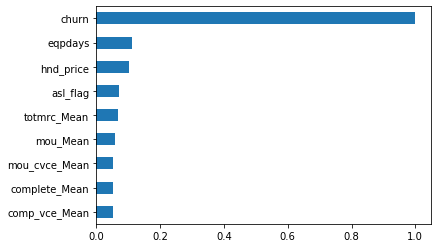

In [37]:
relevant_features.sort_values()[-10:].plot(kind = 'barh')
print("\t\t\tDeep Learning Features")

In [42]:
_, DL_accuracy = model.evaluate(X_test, Y_test)

dict['Deep Learning']= DL_accuracy

print('Deep Learning Accuracy: %.2f' % (DL_accuracy*100))

20000/20000 [==============================] - ETA: 1: - ETA: 3s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 30us/step
Deep Learning Accuracy: 57.31


In [43]:
print('All Alogorithm with there score->',dict)
max_algo = max(dict, key = dict.get)

All Alogorithm with there score-> {'Logistic Regression': 0.5836, 'Decision Tree': 0.5506, 'Random Forest': 0.60505, 'Deep Learning': 0.5731499791145325}


In [50]:
print("Prediction Algorithm Selected by Algorithm Engine--->",max_algo)

Prediction Algorithm Selected by Algorithm Engine---> Random Forest


			Feature selected by Algorithm Engine


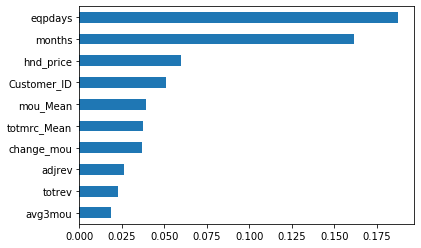

In [51]:
# This code is meant for printing the Attributes with highest weightage / Prediction
weights.sort_values()[-10:].plot(kind = 'barh')
print("\t\t\tFeature selected by Algorithm Engine")